### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

from pandas.plotting import register_matplotlib_converters

กำหนด format ตัวเลขทศนิยมของ pandas

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
# Register pandas formatters and converters with matplotlib.
register_matplotlib_converters()

Csv to Dataframe

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])

In [4]:
print(df_yearly.shape)
df_yearly

(12, 4)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
print(df_monthly.shape)
df_monthly.tail()

(98, 3)


,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


In [6]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [7]:
print(f"Any yearly duplicates? {df_yearly.duplicated().values.any()}")
print(f"Any monthly dupplicates? {df_monthly.duplicated().values.any()}")

Any yearly duplicates? False
Any monthly dupplicates? False


In [8]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [9]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [10]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


- figure คือ การกำหนดขนาดของกราฟ 
- title คือ การตั้งค่า title ของกราฟ
- gca​ คือ ดึงค่า axes ปัจจุบัน 
- twinx คือ สร้าง axes ที่ใช้แกน x ร่วมกัน

#### การกำหนด Grid ให้กราฟ
- grid คือ การกำหนด grid ให้กราฟ


- plot
    - ข้อมูลแกน x
    - ข้อมูลแกน y
    - color คือ สี
    - linewidth คือ ขนาดของกราฟเส้น
    - linestyle คือ style ของกราฟเส้น

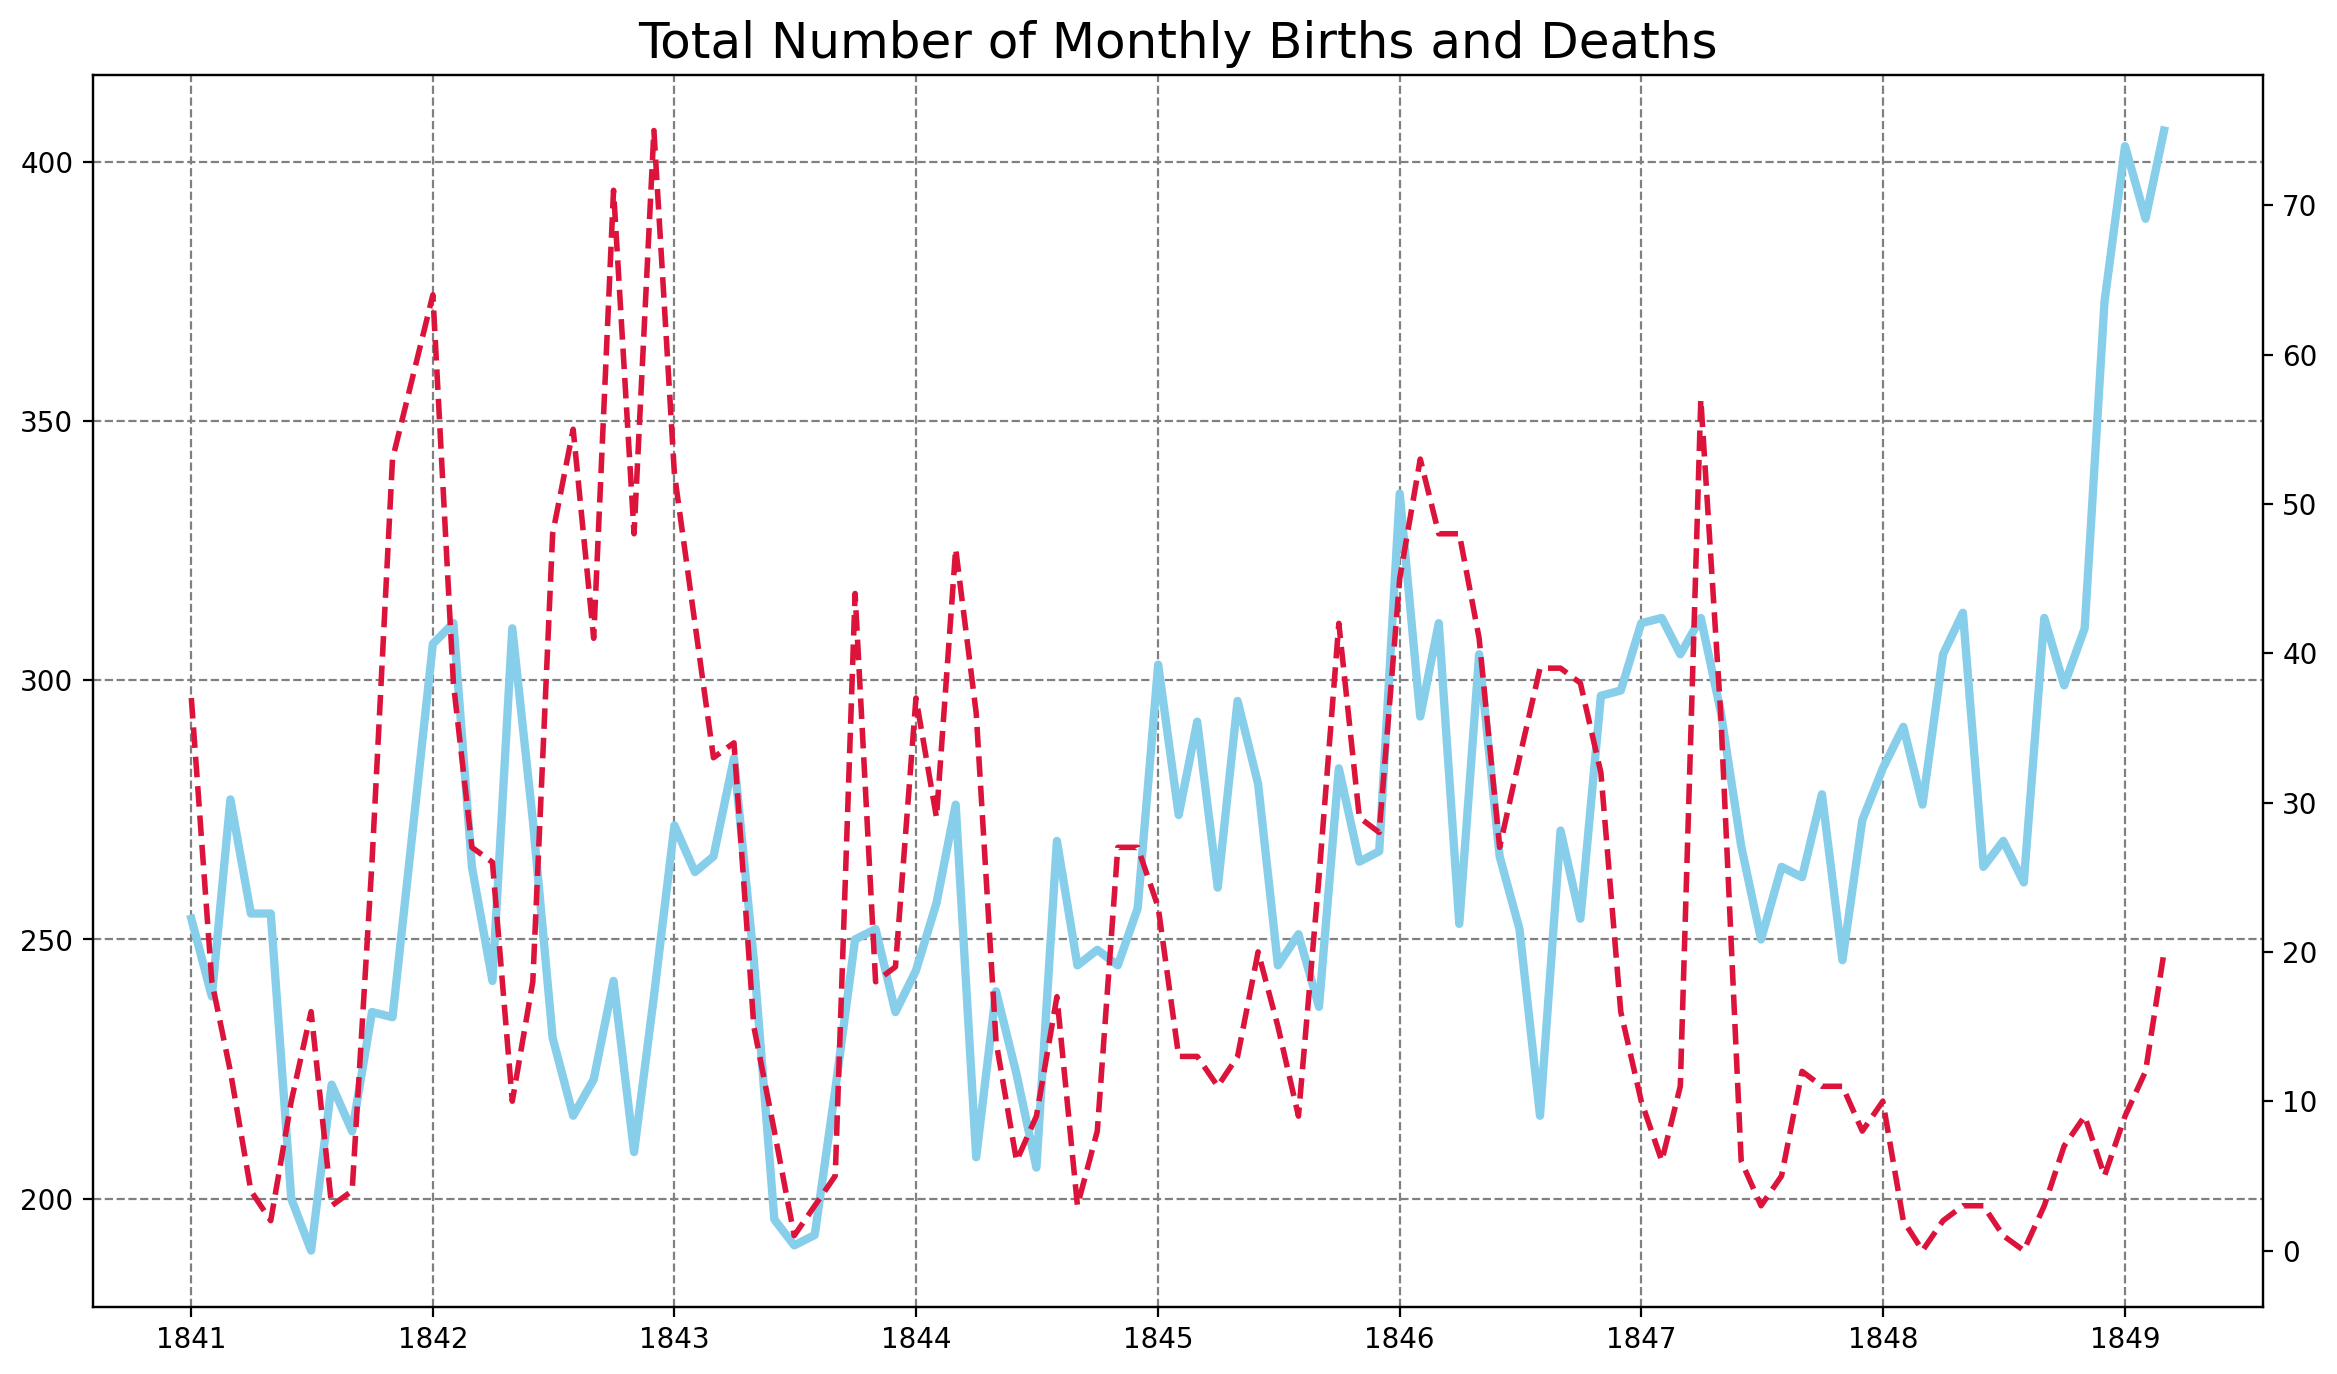

In [11]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

การสร้าง Locator
- YearLocator คือ สร้าง YearLocator
- MonthLocator คือ สร้าง MonthLocator
- DateFormatter คือ สร้าง DateFormatter

In [34]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 


- xaxis คือ 
    - set_major_locator คือ กำหนด locator ให้กับ major
    - set_major_formatter คือ  กำหนด format ให้กับ major
    - set_minor_locator คือ กำหนด locator ให้กับ minor

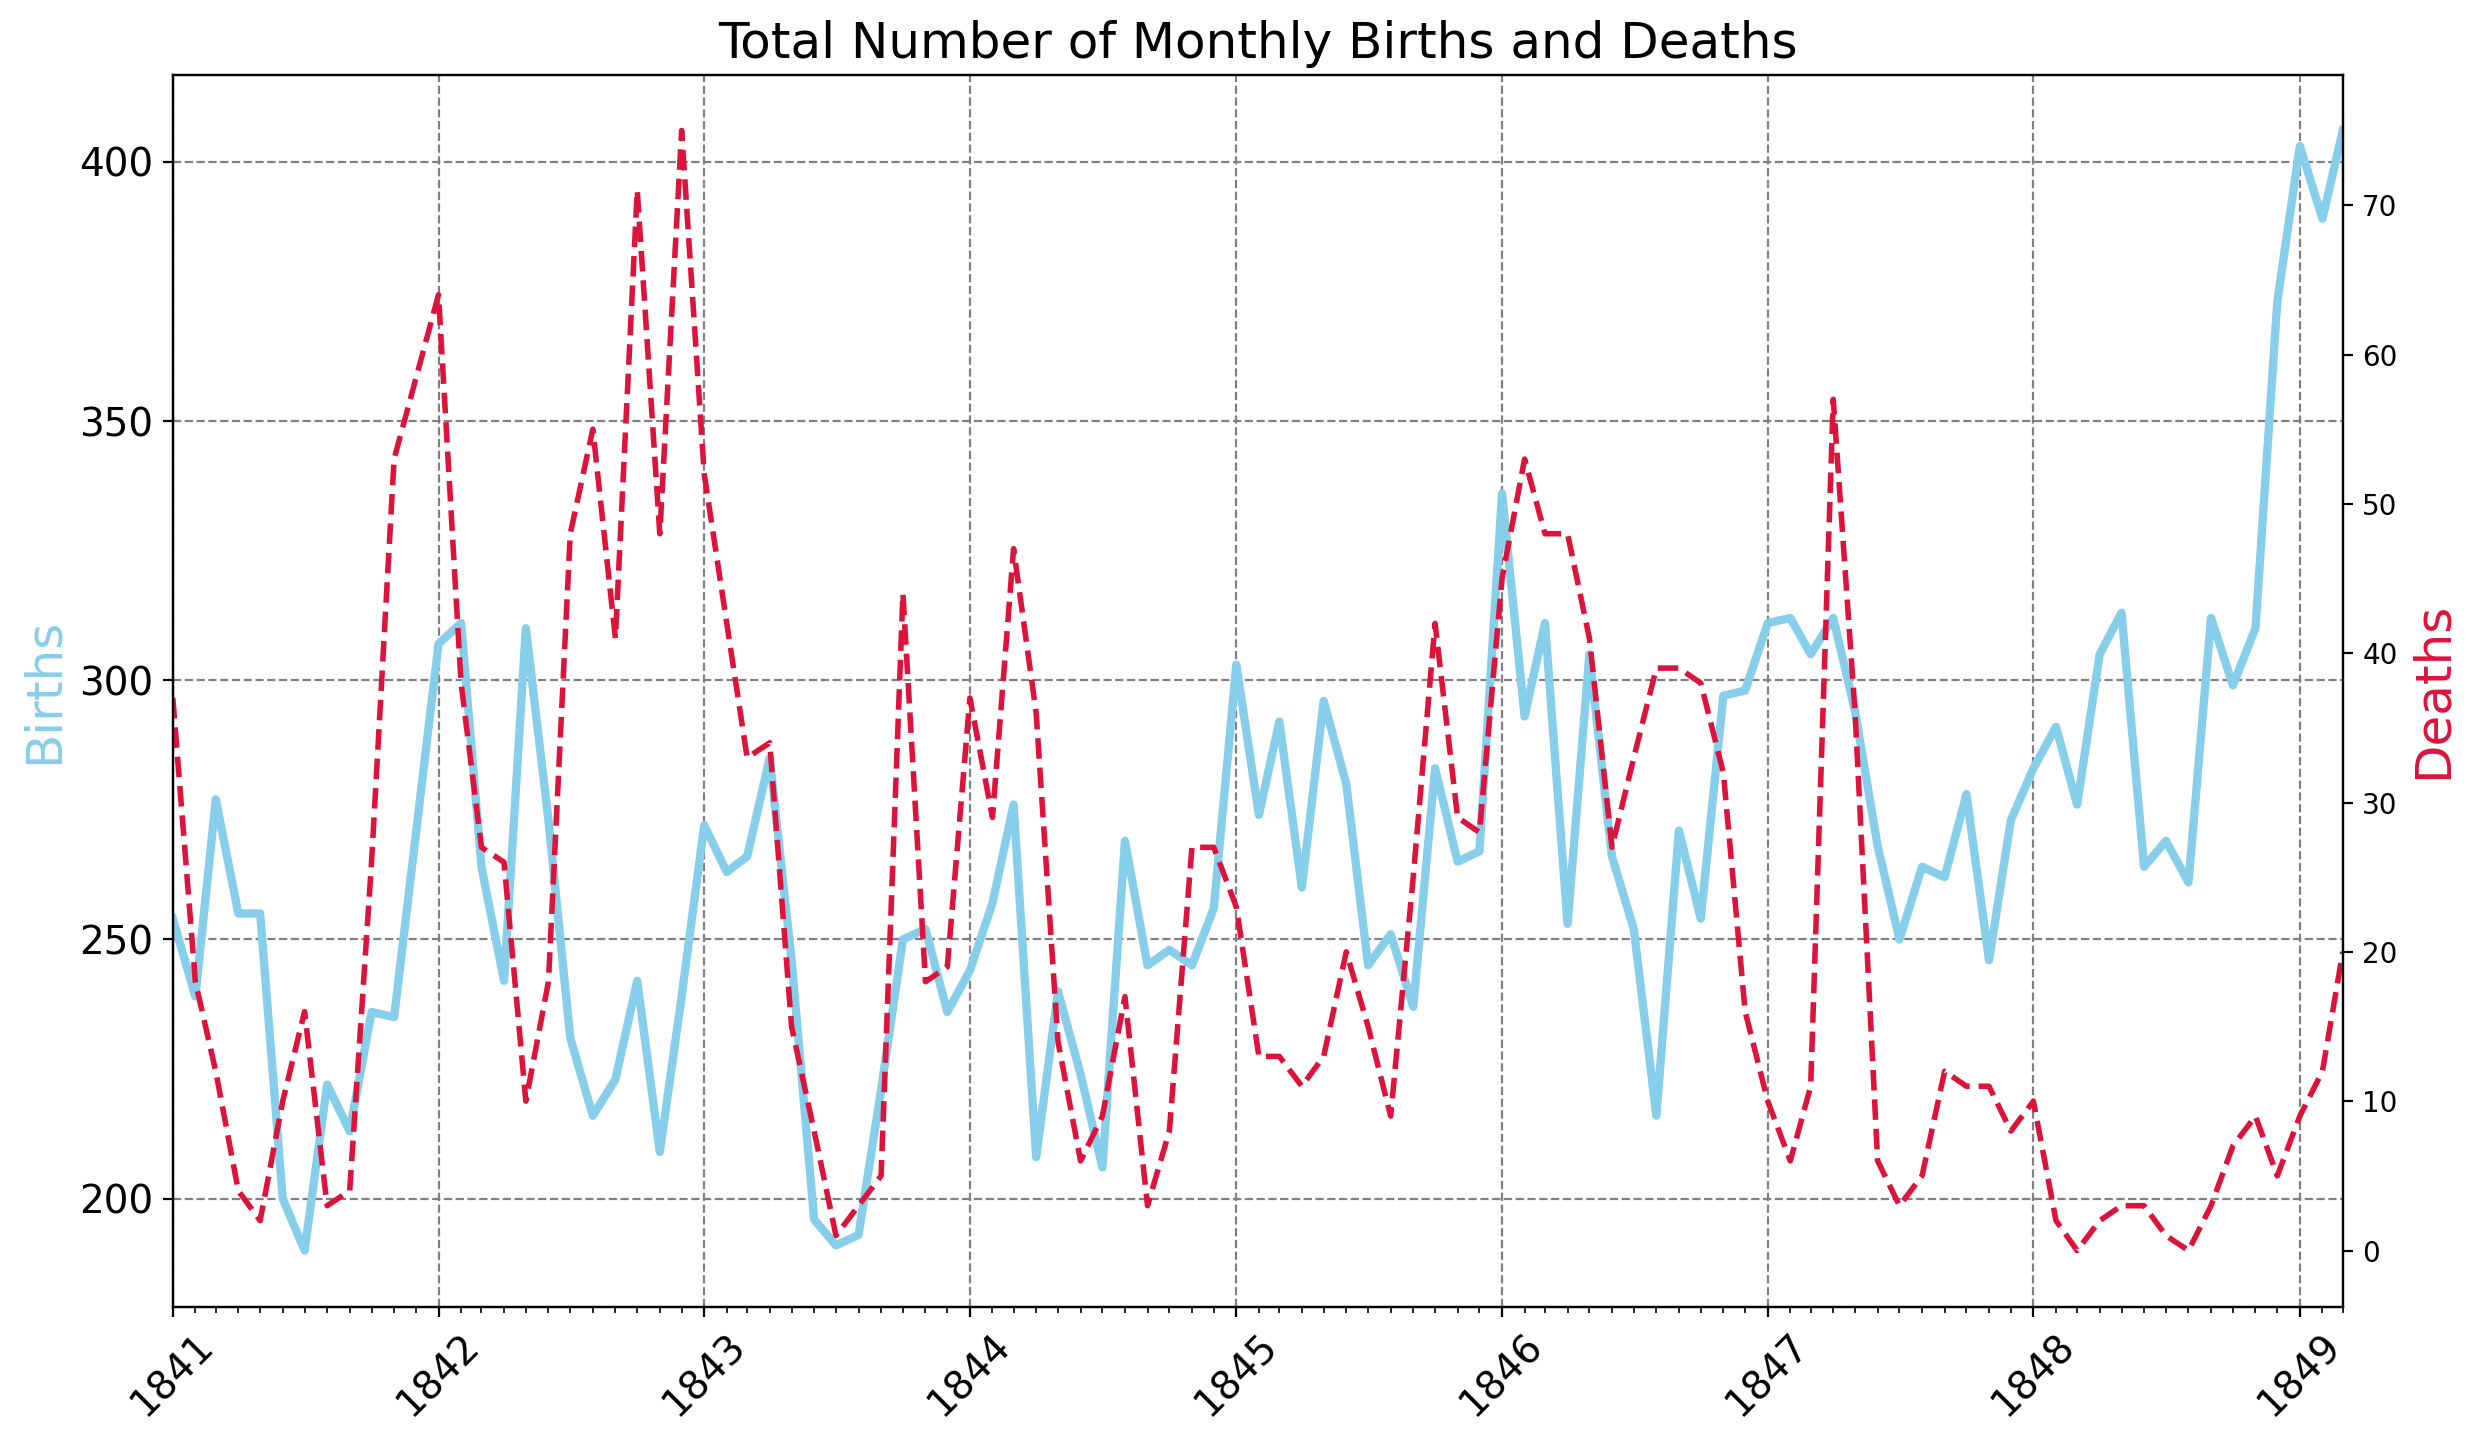

In [33]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

In [14]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [15]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

In [16]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [17]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [18]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

In [19]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [20]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [21]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [22]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


In [23]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

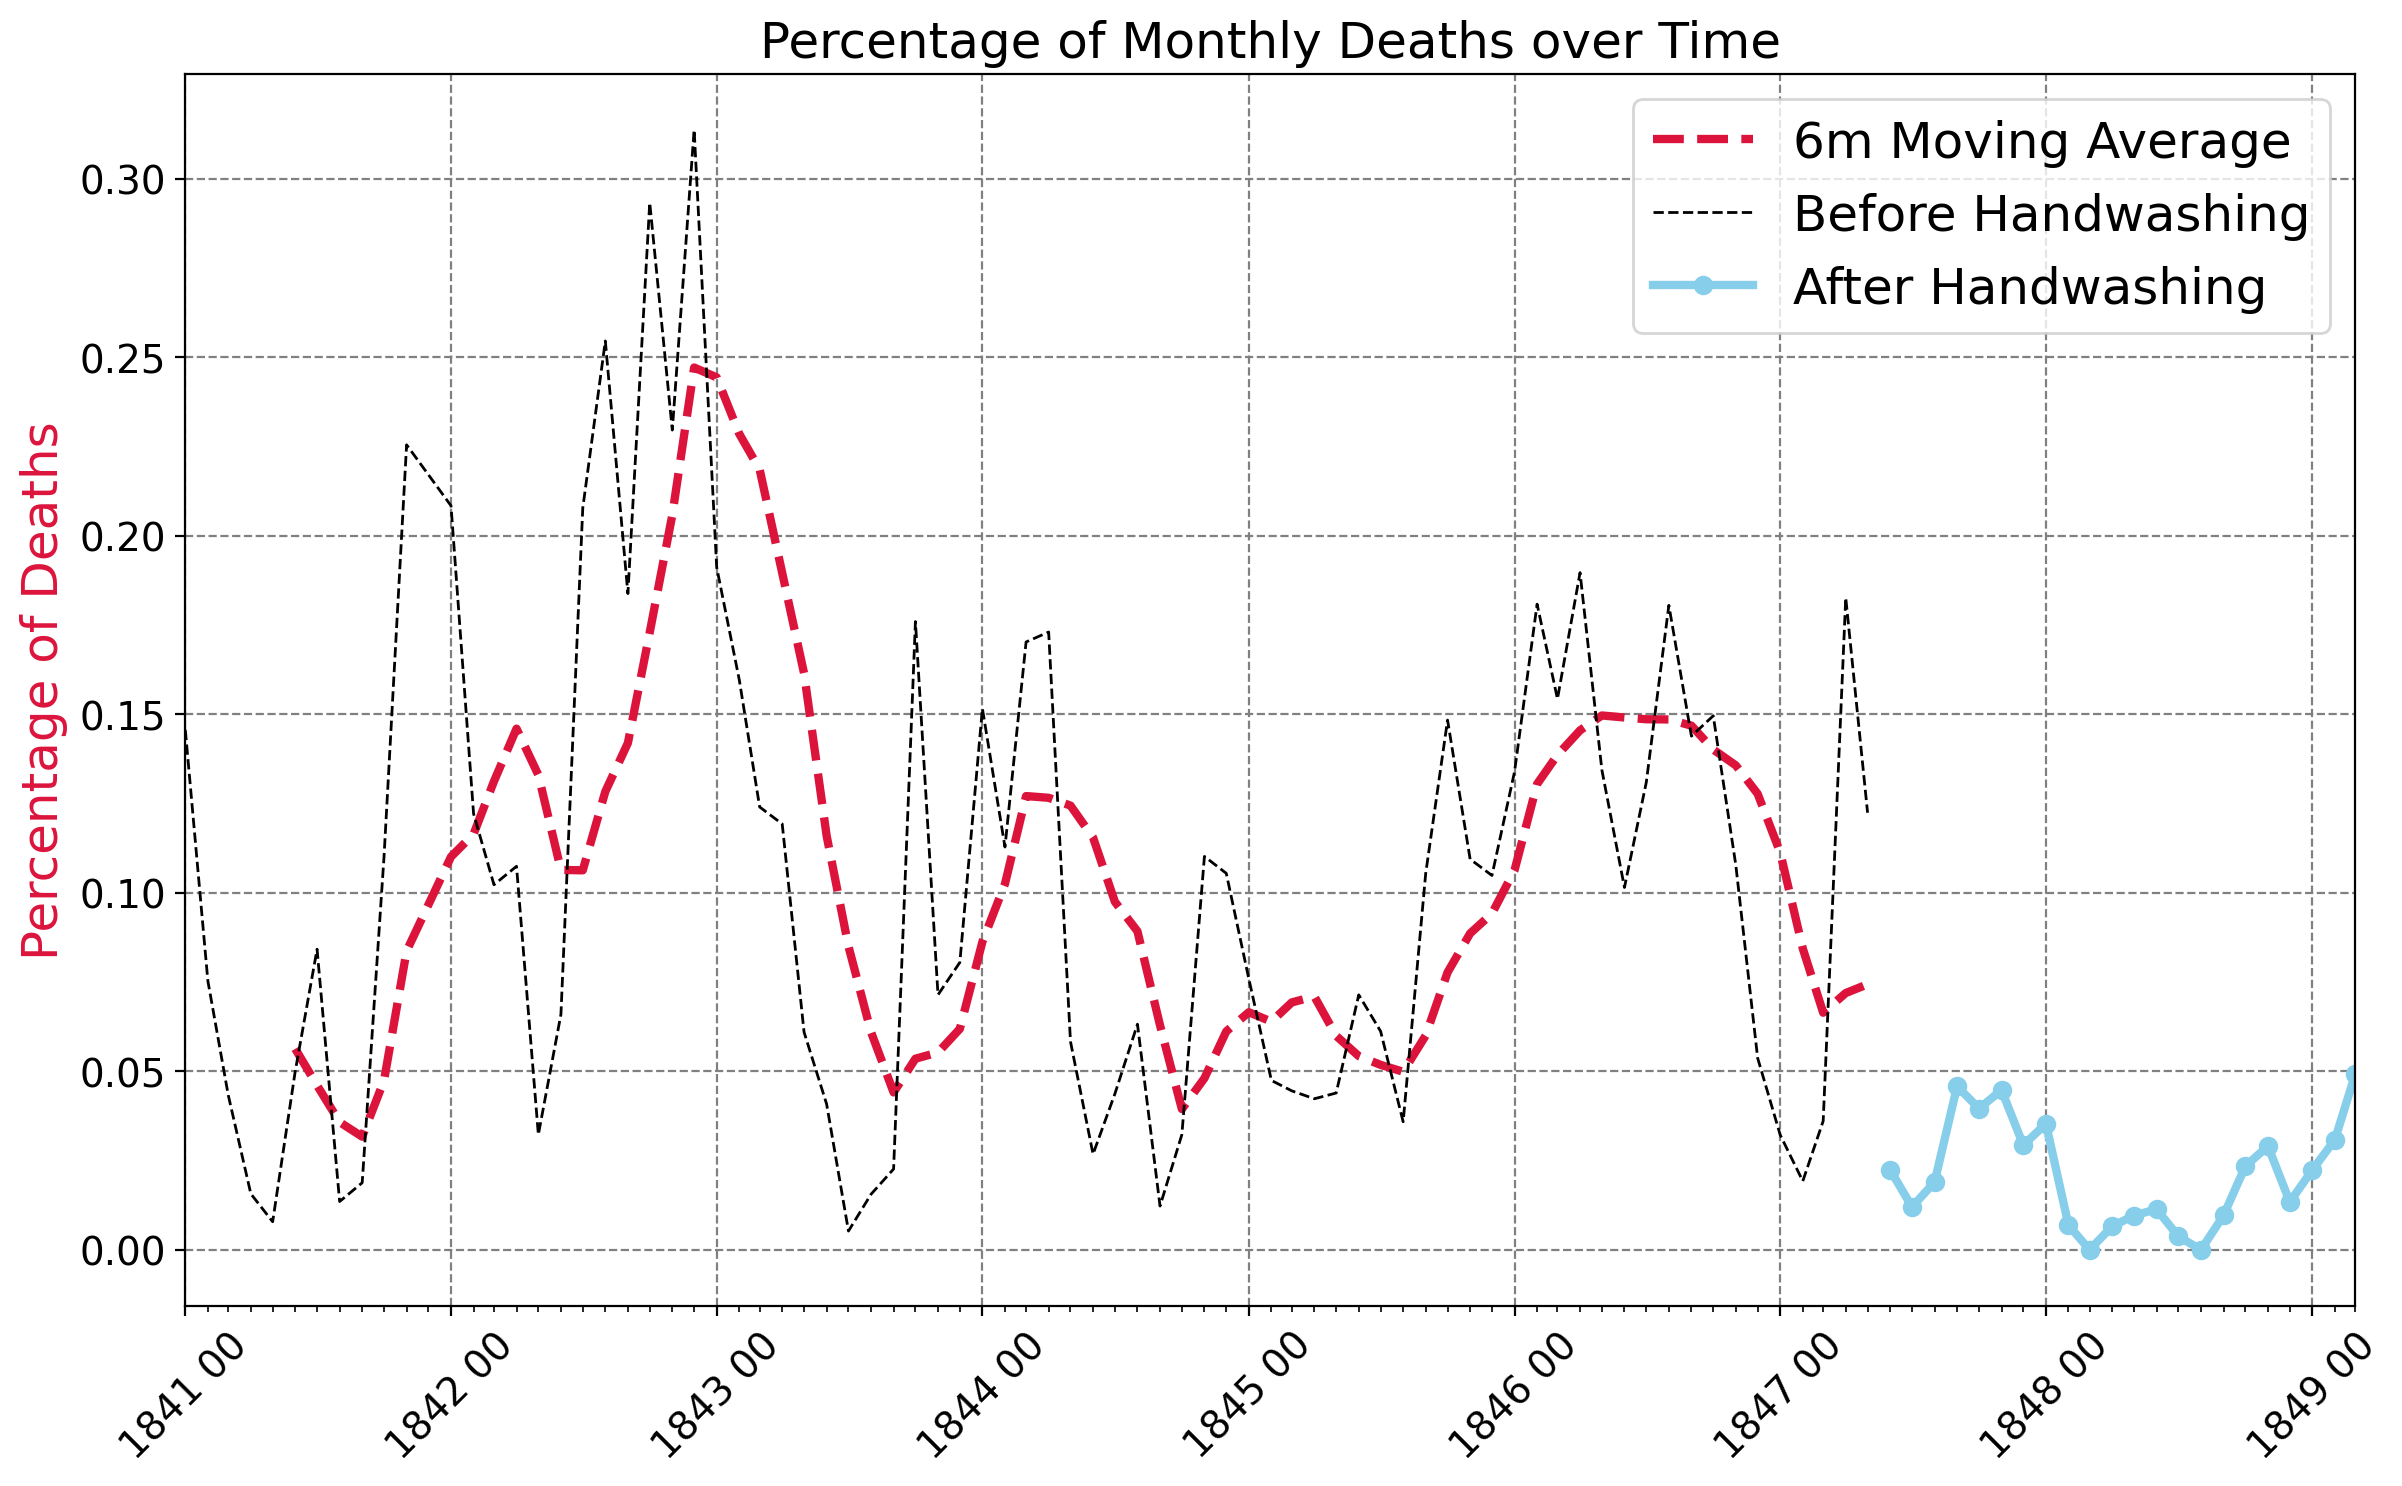

In [24]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

In [25]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


In [35]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


In [27]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

- histogram 
    - x คือ ข้อมูลแกน x
    - color คือ กำหนดสีตามข้อมูลที่ต้องการ
    - nbins คือ จำนวน bins
    - opacity คือ กำหนดความโปร่งแสงของกราฟ
    - barmode คือ กำหนดค่า barmode
    - histnorm คือ percent, probability
    - marginal คือ box, rug, violin
- update_layout 
    - xaxis_title คือ การตั้งค่า title ของแกน x
    - yaxis_title คือ การตั้งค่า title ของแกน y
- show แสดงกราฟ

In [62]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

In [55]:
print(before_washing.pct_deaths)
print(after_washing.pct_deaths)

0    0.15
1    0.08
2    0.04
3    0.02
4    0.01
     ... 
71   0.03
72   0.02
73   0.04
74   0.18
75   0.12
Name: pct_deaths, Length: 76, dtype: float64
76   0.02
77   0.01
78   0.02
79   0.05
80   0.04
81   0.04
82   0.03
83   0.04
84   0.01
85   0.00
86   0.01
87   0.01
88   0.01
89   0.00
90   0.00
91   0.01
92   0.02
93   0.03
94   0.01
95   0.02
96   0.03
97   0.05
Name: pct_deaths, dtype: float64


- kdeploy คือ การแสดงภาพการกระจายของการสังเกตในชุดข้อมูล คล้ายกับฮิสโตแกรม KDE แสดงข้อมูลโดยใช้เส้นกราฟความหนาแน่นของความน่าจะเป็นแบบต่อเนื่องในหนึ่งมิติหรือมากกว่า
    - ข้อมูลแกน x
    - fill คือ เติมพื้นที่สี
    - clip คือ ขอบเขตการประเมินความหนาแน่น

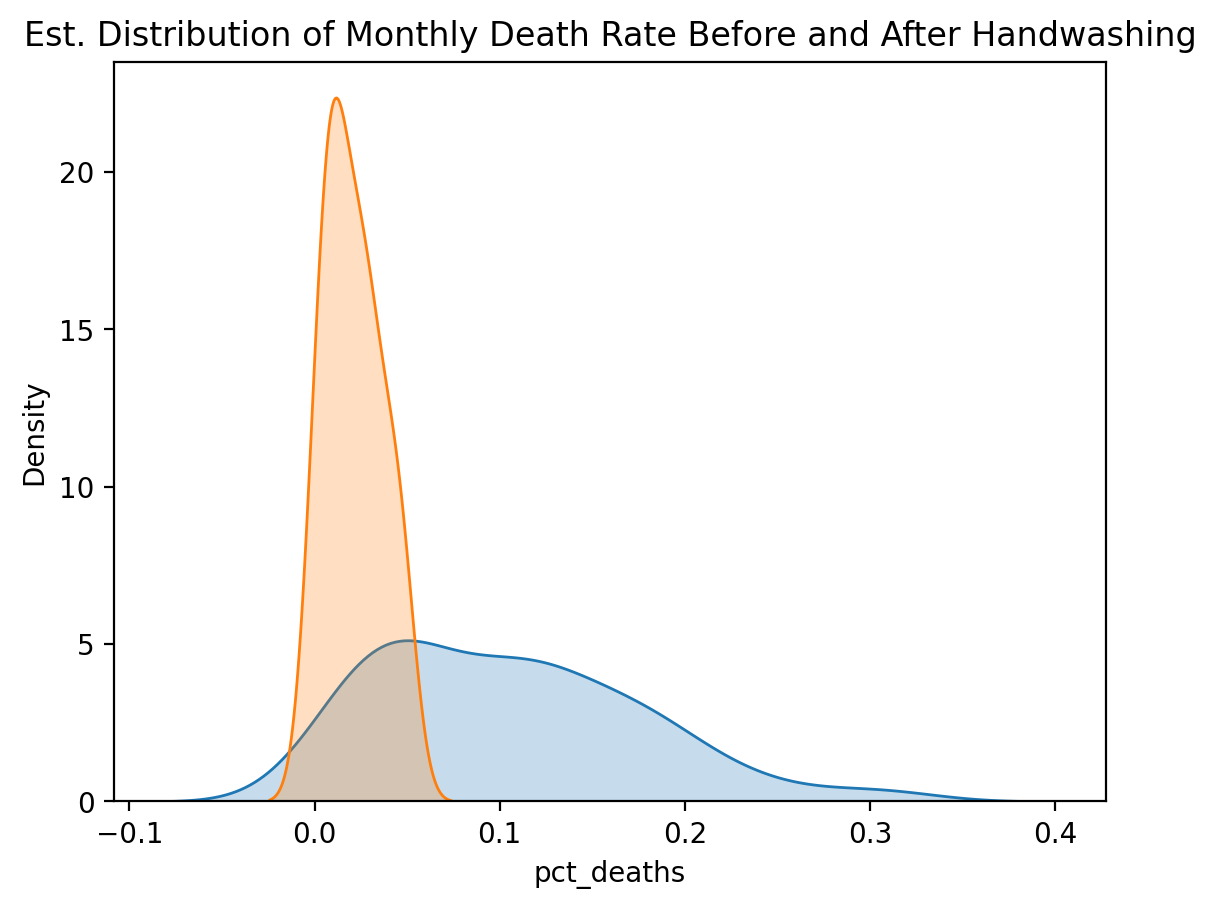

In [59]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, fill=True)
sns.kdeplot(after_washing.pct_deaths, fill=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

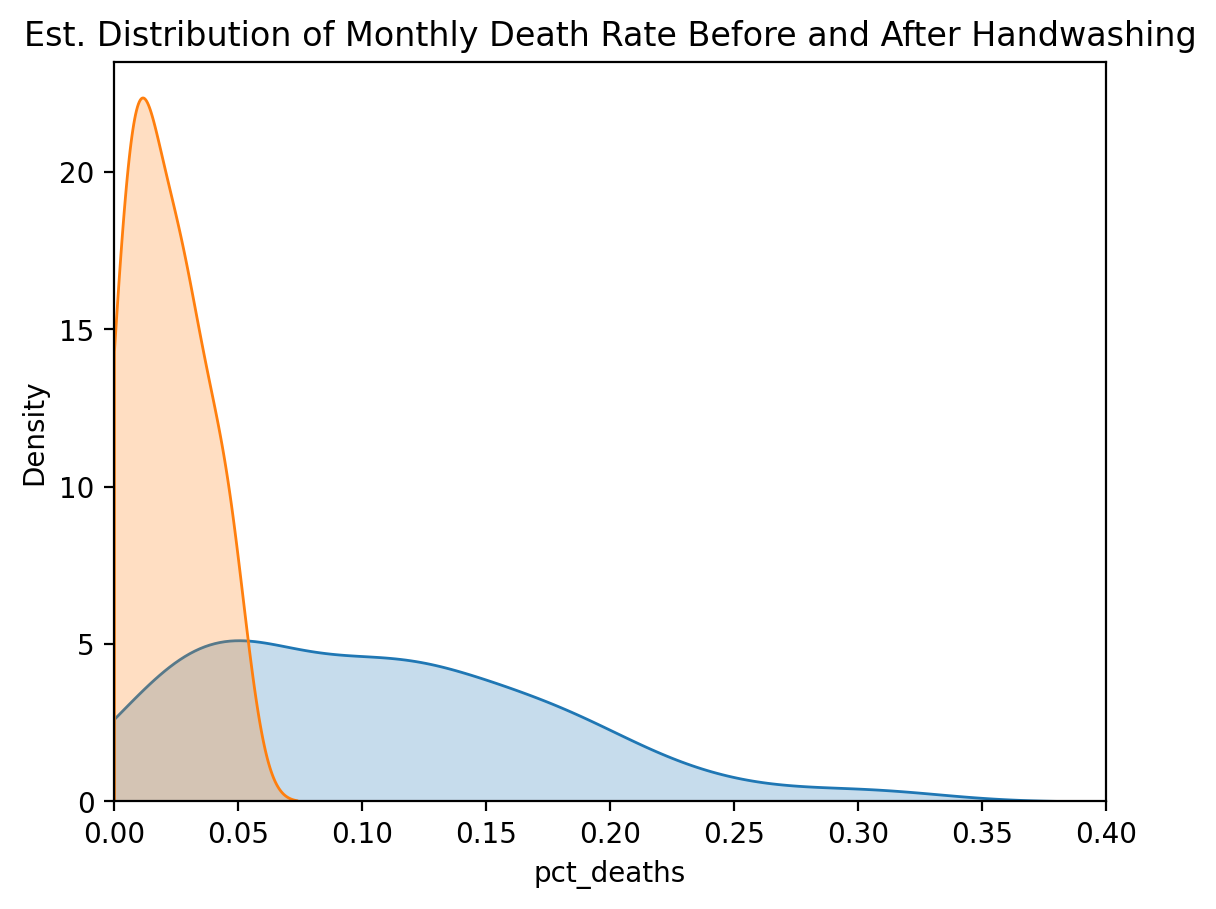

In [61]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            fill=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            fill=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [31]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512
